<a href="https://colab.research.google.com/github/mohamedHashem250/DeepLearningArchitecture/blob/main/Convolution_Neural_Networks/CNN_for_Cifar10_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from keras.datasets import cifar10
import numpy as np

In [2]:
#loading dataset:
(x_train,y_train),(x_test, y_test) = cifar10.load_data()
x_train.shape, x_test.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


((50000, 32, 32, 3), (10000, 32, 32, 3))

In [3]:
type(x_train)

numpy.ndarray

In [4]:
#Preprocessing dataset
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32')/ 255

In [5]:
#Building the model with sequential method
model = tf.keras.models.Sequential([
                 tf.keras.Input(shape = (32,32, 3), batch_size = None),
                 tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', strides =(1,1) , padding = 'valid'),#output:30*30*32
                 tf.keras.layers.MaxPool2D(pool_size = (2,2), padding = 'valid',strides = None),#output:15*15*32
                 tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu',strides =(1,1) , padding = 'valid'),#ouput:13*13*64
                 tf.keras.layers.MaxPool2D(pool_size = (2,2), padding = 'valid', strides = None),#output:6*6 * 64
                 tf.keras.layers.Flatten(),#output: 3136
                 tf.keras.layers.Dense(units = 64, activation = 'relu'),#output: 64
                 tf.keras.layers.Dense(units = 10, activation = 'softmax')   #output:10
        ]

)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
#compile the model:
model.compile(optimizer = 'adam', loss = 'SparseCategoricalCrossentropy',metrics =['accuracy'] )


In [8]:
history = model.fit(x_train, y_train,
                    epochs = 50,
                    batch_size = 32,
                    validation_data = (x_test, y_test),
                    verbose = 1)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.3816 - loss: 1.7015 - val_accuracy: 0.5874 - val_loss: 1.1817
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6003 - loss: 1.1378 - val_accuracy: 0.6325 - val_loss: 1.0566
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6511 - loss: 0.9872 - val_accuracy: 0.6629 - val_loss: 0.9829
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6894 - loss: 0.8945 - val_accuracy: 0.6776 - val_loss: 0.9320
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7125 - loss: 0.8190 - val_accuracy: 0.6586 - val_loss: 0.9830
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7368 - loss: 0.7612 - val_accuracy: 0.6853 - val_loss: 0.9164
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7557 - loss: 0.7030 - val_accuracy: 0.7010 - val_loss: 0.8844
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7730 - loss: 0.6519 -

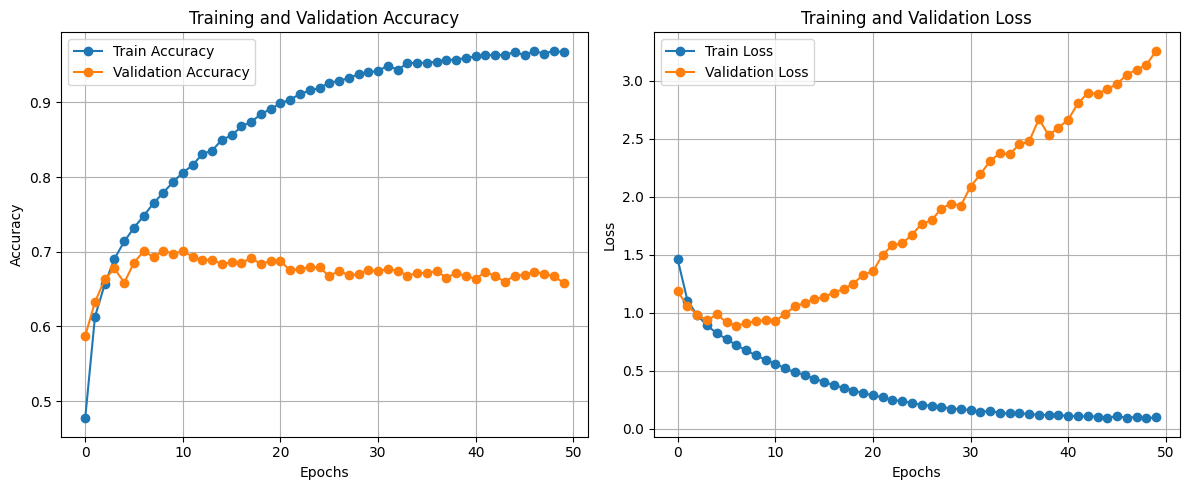

In [9]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
#we need some adapt the layers and filters to avoid this overfitting.